In [1]:
import pandas as pd

C:\Users\hamza\AppData\Local\Temp\ipykernel_18020\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# df = pd.read_csv('players_blegium_japan.csv')
# df = pd.read_csv('fifaplayers.csv')
# df = pd.read_csv('timestampplayers.csv')
# df = pd.read_csv('playersNball.csv')
df = pd.read_csv('beforeplayersNball.csv')
df

,id,teamId,frame,x,y,ball_posession,timestamp,ball_x,ball_y
0,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Red,0,29,-1,0,0.00,29,81
1,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Red,0,46,55,0,0.00,29,81
2,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Red,0,51,49,0,0.00,29,81
3,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Red,0,54,75,0,0.00,29,81
4,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Red,0,32,37,0,0.00,29,81
...,...,...,...,...,...,...,...,...,...
33049,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Red,1660,20,60,0,24.14,12,49
33050,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Green,1660,23,49,0,24.14,12,49
33051,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Red,1660,35,40,0,24.14,12,49
33052,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Red,1660,18,55,0,24.14,12,49


In [71]:
import numpy as np
# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

def euclidean_distance2(a, b,c,d):
    return np.sqrt((a-c) ** 2 + (b-d) ** 2)

# Radius for pressure calculation
radius = 5
threshold=10
# Initialize lists to store x and y points
xpoints = []
ypoints = []
pressures = []
p=[]
ts=[]
team=[]
c=0
points = []
epoints = []  
start_x = None
start_y = None
end_y = None
end_x = None  
pass_completions = []
# Iterate ove
# r each row in the DataFrame
for index, row in df.iterrows():
    if row['ball_posession'] == 1:
        # Reset the pressures list for each ball possession event
        pressures = []
        if start_x is None:  # Starting point
            start_x = row['x']
            start_y = row['y']
            points.append((start_x, start_y))  # Append starting point
            team.append(row['teamId'])
            ts.append(row['timestamp'])
            s=row['teamId']
            if end_x and end_y is not None:
                epoints.append((end_x, end_y))      # Append ending point
                e=row['teamId']
            else:
                epoints.append((start_x, start_y))  # Append starting point
                p.append(0)
                pass_completions.append("no pass attempted")
        else:  # Ending point
            end_x = row['x']
            end_y = row['y']
            start_x = None
            start_y = None
            # Get the x, y coordinates of the ball possession event
            ball_pos_x = row['x']
            ball_pos_y = row['y']
            frame = row['frame']
            # if s == e:
            #     if start_x == end_x and start_y == end_y:
            #         pass_completions.append("no pass attempted")
            #     else:
            #         pass_completions.append("pass completed")
            # else:
            #     pass_completions.append("pass incomplete")

            # # Append x and y points
            # xpoints.append(ball_pos_x)
            # ypoints.append(ball_pos_y)
            # Calculate distances from the ball possession event to all other events in the same frame
            distances = []
            for _, event_row in df[(df['frame'] == frame) & (df['ball_posession'] == 0)].iterrows():
                event_x = event_row['x']
                event_y = event_row['y']
                distance = euclidean_distance((ball_pos_x, ball_pos_y), (event_x, event_y))
                
                # Calculate pressure rating considering the radius
                if distance <= radius:
                    # Check if the event belongs to the opposite team
                    if event_row['teamId'] != row['teamId']:
                        if distance == 5: 
                            pressures.append(0.3)
                        elif distance<5:
                            pressures.append(max(0, radius - distance))  # Subtract distance from radius and append to pressures list
                        
            
            # Calculate the average pressure rating for the frame
            if pressures:
                avg_pressure = max(pressures) # Average pressure if multiple players detected
                p.append(round(avg_pressure))  # Append average pressure to pressures list
            else: 
                p.append(0)

# Create DataFrame df_pressure
df_pressure = pd.DataFrame({
    "start": points,
    "end": epoints,
    "PressureRating": p,  # Use the pressures list
    "Team": team,
    "TimeStamp": ts,
})
print(df_pressure)
#  if pressures:
#             if len(pressures)<3:
#                 avg_pressure = (sum(pressures) / len(pressures))  # Average pressure if multiple players detected
#                 p.append(avg_pressure)  # Append average pressure to pressures list
#             else:
#                 p.append(max(pressures))
#         else: 
#             p.append(0)


        start       end  PressureRating  Team  TimeStamp
0    (30, 81)  (30, 81)               0   Red       0.00
1    (29, 80)  (30, 80)               5   Red       0.03
2    (29, 79)  (29, 80)               4  Blue       0.07
3    (29, 80)  (29, 80)               0  Blue       0.10
4    (28, 80)  (28, 80)               0  Blue       0.13
..        ...       ...             ...   ...        ...
356  (34, 44)  (35, 41)               0  Blue      21.65
357  (33, 45)  (34, 44)               0  Blue      21.77
358  (33, 41)  (33, 45)               0  Blue      21.81
359  (30, 46)  (33, 41)               0  Blue      22.32
360  (29, 45)  (29, 46)               4  Blue      22.52

[361 rows x 5 columns]


In [74]:
import numpy as np
 
# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

# Threshold distance
threshold = 10

# Iterate through each row and apply distance threshold if PassCompletion is not "no pass attempted"
for index, row in df_pressure.iterrows():
            distance = euclidean_distance(row['start'], row['end'])
            if distance < threshold:
                # Remove row if distance is below threshold
                df_pressure.drop(index, inplace=True)

print(df_pressure)

        start       end  PressureRating  Team  TimeStamp
22   (42, 76)  (22, 80)               0  Blue       1.48
26   (25, 66)  (42, 78)               4   Red       1.60
95   (75, 80)  (49, 77)               0   Red       5.94
97   (78, 79)  (31, 60)               3   Red       6.01
101  (53, 78)  (75, 77)               0   Red       6.56
108  (74, 75)  (54, 78)               0   Red       7.07
109  (74, 75)  (68, 65)               0   Red       7.09
147  (88, 45)  (73, 56)               1  Blue      10.26
149  (71, 30)  (77, 48)               0   Red      11.63
173  (79, 46)  (83, 26)               1  Blue      13.58
174  (95, 36)  (79, 46)               0  Blue      13.75
189  (78, 44)  (90, 37)               0   Red      14.76
190  (75, 62)  (77, 44)               4  Blue      15.03
193  (75, 43)  (75, 62)               0  Blue      15.10
194  (75, 45)  (75, 62)               0   Red      15.13
199  (55, 53)  (73, 44)               4  Blue      15.85
206  (55, 53)  (85, 80)        

In [48]:
#find maxium ycoordinate in both starting and ending point in df_fin
max_y = max(df_pressure['start'].apply(lambda x: x[1]).max(), df_pressure['end'].apply(lambda x: x[1]).max())
max_y
over= max_y-80

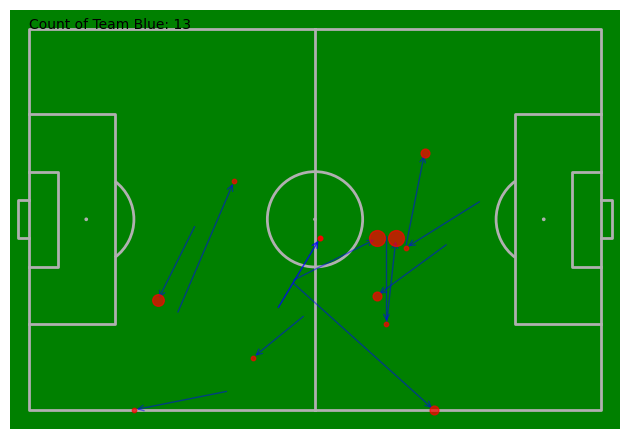

In [93]:
import matplotlib.pyplot as plt
import pandas as pd
from mplsoccer import Pitch

# Filter out passes where the starting point of the current pass is the same as the ending point of the previous pass
filtered_rows = []
previous_end_point = None

for index, row in df_pressure.iterrows():
        if previous_end_point is None or row['start'] != previous_end_point:
            filtered_rows.append(row)
        previous_end_point = row['end']

filtered_df = pd.DataFrame(filtered_rows)

# Assuming you have already created a plot named 'ax'
pitch = Pitch(pitch_color='green', goal_type='box', goal_alpha=1)
fig, ax = pitch.draw()

# Assigning colors based on PassCompletion
pass_completion_colors = {
    "no pass attempted": "blue",
    "pass completed": "yellow",
    "pass incomplete": "red"
}

c=0
# Iterate through the DataFrame to plot arrows between consecutive points
for index, row in filtered_df.iterrows():
    if row['Team'] == "Blue":
        x_start, y_start = row['start']
        x_end, y_end = row['end']
        y_start= y_start-over
        y_end= y_end-over
        marker_size = 10+(row['PressureRating']*30)
        ax.annotate("", xy=(x_start, y_start), xytext=(x_end, y_end),
                    arrowprops=dict(arrowstyle='<-', color='blue', alpha=0.5))
        # ax.scatter(x_start, y_start, color='blue', s=20, zorder=3, alpha=0.7)
        ax.scatter(x_end, y_end, color='RED', s=marker_size, zorder=3, alpha=0.7)
        c=c+1

ax.text(0, 0, f"Count of Team Blue: {c}", fontsize=10, color='black')

plt.show()  # Show the plot
